# Note: The package you may need to do this lab is **scipy.stats**

###Task 1 - Binomial Distribution (hint: use binom)

60 percent of a large software company’s customers use the latest version of its operating system.  If a random sample of 25 customers are selected for a telephone survey, write a code (use binomial distribution) to calculate the probability that: 



*   exactly 8 customers who uses the latest version is selected
*   more than 6 customers who uses the latest version are selected
*   atmost 12 customers who uses the old version are selected
* plot a binomial distrution of number of customers using latest version of operating system


					




 Probability of exactly 8 customers is: 0.003120947735557756
 Probability of more than 6 customers is: 0.999719284752399
 Probability of at most 12 customers using the old software is: 0.7322821733612022


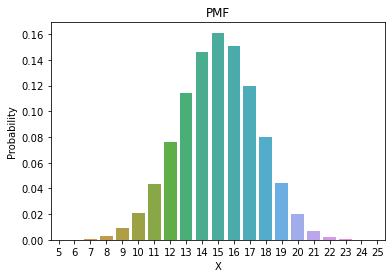

In [18]:
#Import libraries
import scipy.stats as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random as rd


#Using Binomial Distribution

n = 25 
p = 0.6 #probability of selecting latest version of operating system

# For exacly 8 customers ( First Question is done for you)
print(" Probability of exactly 8 customers is:", sc.binom.pmf(8,n,p))

# For more than 6 customers P(X>6) = 1 - P(X<=6)
print(" Probability of more than 6 customers is:", 1-sc.binom.cdf(6,n,p))

# For atmost 12 customers 
print(" Probability of at most 12 customers using the old software is:", 1-sc.binom.cdf(13,n,p))


#Probability Distribution
x = sc.binom.pmf(np.arange(5,26,1), n, p)
sns.barplot(x=np.arange(5,26,1), y=x)
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('PMF')
plt.show()

###Task 2 - Normal Distribution (hint:use norm)

The length of time taken for queries to a mobile network company to be resolved is approximately normally distributed with a mean of 20 hours and a standard deviation of 5 hours.
Determine the proportion of queries which take:

* longer than 25 hours to resolve;
									
* less than 18 hours to resolve;
									
* between 15 and 30 hours.
			
* minimum number of hours within which 70% of queries are resolved.


In [13]:
# Using Normal Distribution ( Write you code here)
mean = 20
std  = 5

# Longer than 25h
print("Proportion of the queries that take longer than 25 hours is " + str((1-sc.norm.cdf(25,mean,std)) * 100) +"%")

# Less than 18h
print("Proportion of the queries that take less than 18 hours is ", str(sc.norm.cdf(18,mean,std) * 100) + "%")

# Between 15 and 30h
print("Proportion of the queries that take between 15 and 30 hours is ", str((sc.norm.cdf(30,mean,std)-sc.norm.cdf(15,mean,std)) * 100) + "%")

# Longer than 25h
print("Minimum number of hours within which 0.7 of the queries are resolved ", sc.norm.ppf(0.7,mean,std))


Proportion of the queries that take longer than 25 hours is 15.865525393145708%
Proportion of the queries that take less than 18 hours is  34.45782583896758%
Proportion of the queries that take between 15 and 30 hours is  81.85946141203637%
Minimum number of hours within which 0.7 of the queries are resolved  22.622002563540203


### Task 3 - Poissan Distribution and Central Limit Theorem. 

The rate of the number of calls to a customer service center is equal to 9 calls per minute. 

* Generate and plot a histogram (count Vs distribution) of a posson distrbution of size 10,000 of the number of calls per minute. Compare this with the probability density plot (density Vs distribution).
* What is the probability of getting more than 16 calls per minute? Find the count(out of 10,000 instances) of getting more than 16 calls per minute.
* Show that the means of the samples (greater than 30) taken from this poisson distrbution is normally distributed (Center limit Theorem). 

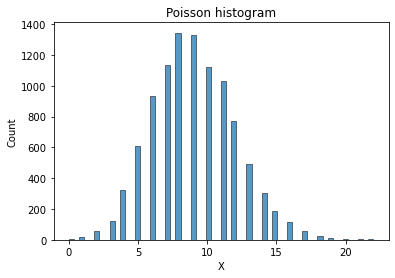

In [14]:
# Generate and plot poisson distribution. You can create additional code cells to display outputs
k  = 10000
mu = 9

poi = sc.poisson.rvs(mu, size=k)

sns.histplot(poi)
plt.xlabel('X')
plt.ylabel('Count')
plt.title('Poisson histogram')
plt.show()

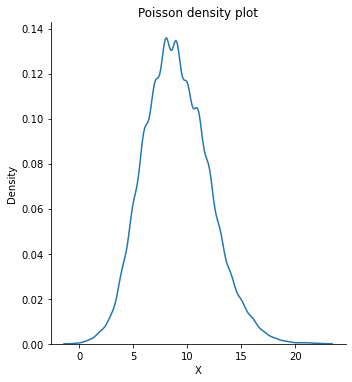

In [15]:
# Plot for density

sns.displot(poi, kind="kde")
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Poisson density plot')
plt.show()

Probability of getting more than 16 calls is  0.011105909377583822
Instances with more than 16 calls:  103
CLT proof plot


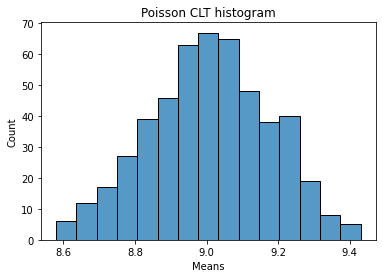

In [16]:
#probability of getting more than 16 calls P(X>16) = 1 - P(X<=16)
print("Probability of getting more than 16 calls is ", 1-sc.poisson.cdf(16, mu) )
#Count of cases with more than 16 calls
print("Instances with more than 16 calls: ", np.sum(poi > 16))

# To prove the central limit theorem
means = np.array([])
for i in range(500):
    means = np.append(means, np.random.choice(poi, size=300).mean())


print("CLT proof plot")
sns.histplot(means)
plt.xlabel('Means')
plt.ylabel('Count')
plt.title('Poisson CLT histogram')
plt.show()

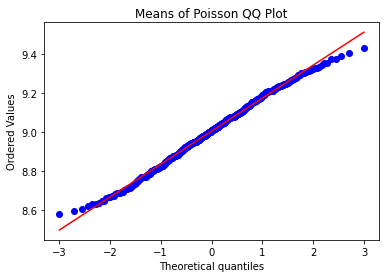

In [17]:
sc.probplot(means, plot=sns.mpl.pyplot)
plt.title("Means of Poisson QQ Plot")
plt.show()